In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from scipy.spatial.distance import pdist, squareform
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D



In [2]:
plt.rcParams['xtick.labelsize'] = 22 # or whatever size you want
plt.rcParams['ytick.labelsize'] = 22 # or whatever size you want

# Set global font size for labels, titles and legends
plt.rcParams['axes.labelsize'] = 20# or whatever size you want
plt.rcParams['axes.titlesize'] = 20 # or whatever size you want
plt.rcParams['legend.fontsize'] = 20 # or whatever size you want
#plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True


In [3]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

mpl.rcParams['svg.fonttype'] = 'none'

In [4]:
# load model data
from basico import *
model = load_model('ap1_model_2.cps')
set_task_settings(T.STEADY_STATE, settings={'method': {'Use Newton': False, 'Use Integration': True}})

In [5]:
# import simulated steady states and initial conditions plus input parameters
folder_path = "/Volumes/FallahiLab/Maize-Data/Data/Yonatan_Degefu/AP1_mechanistic_modelling/processed_simulations/"
#model_name = "ap1_model_new_simulations_V7_highFOS_range.csv"
model_name = "100825_simulations_V5_steadystates.csv"
model_path = os.path.join(folder_path, model_name)
model_states = pd.read_csv(model_path)

# import input parameters and initial conditions
#input_name = "parameter_initial_condition_input_V7.csv"
input_name = "100825_parameter_initial_condition_input_V5.csv"
input_path = os.path.join(folder_path, input_name)
input_states_1 = pd.read_csv(input_path)

In [ ]:
# # read calibrated parameter values
# cal_file = "calibrated_param_initcond_inputs.csv"
# cal_path = "/Volumes/FallahiLab/Maize-Data/Data/Yonatan_Degefu/COPASI_Modeling/Basico_python/Copasi_basico_cluster/Multistable_param_analysis/"

# calibtated_data = pd.read_csv(cal_path + cal_file)

In [6]:
# remove state from model_states
#model_states = model_states.drop(columns=["state"])
model_states

,param_index,init_cond_index,fos,jun,fra1,fra2,jund,state
0,0,101,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
1,0,71,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
2,0,70,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
3,0,69,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
4,0,68,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
...,...,...,...,...,...,...,...,...
3935995,19999,71,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"
3935996,19999,72,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"
3935997,19999,73,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"
3935998,19999,63,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"


In [7]:
input_states_1

,param_index,init_cond_index,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_fra2).v,(basal_jund).v,(jun_by_junjun).beta,(jun_by_junfos).beta,(fra1_by_junfra1).beta,...,(degradation_fos).k1,(degradation_jun).k1,(degradation_fra1).k1,(degradation_fra2).k1,(degradation_jund).k1,fos,jun,fra1,fra2,jund
0,0,100,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.62175,0.66562,0.62684,0.13611,0.19882,1.15866,129.64109,0.82135,64.92609,1.63517
1,0,193,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.62175,0.66562,0.62684,0.13611,0.19882,150.17111,3.70649,3.36273,28.04280,5.88032
2,0,192,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.62175,0.66562,0.62684,0.13611,0.19882,6.21503,104.39339,22.10228,44.68412,7.31297
3,0,191,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.62175,0.66562,0.62684,0.13611,0.19882,169.33635,10.84113,2.69760,0.57990,1.23386
4,0,190,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.62175,0.66562,0.62684,0.13611,0.19882,0.45526,19.51223,1.11790,165.04464,151.10693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,19999,198,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,0.99358,1.42201,0.44026,0.23894,0.20119,0.88164,13.47613,0.69217,0.65776,302.72699
3935996,19999,199,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,0.99358,1.42201,0.44026,0.23894,0.20119,5.26777,8.61649,134.99632,204.14300,0.92422
3935997,19999,189,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,0.99358,1.42201,0.44026,0.23894,0.20119,1.43262,2.35414,5.55901,57.24456,4.10586
3935998,19999,190,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,0.99358,1.42201,0.44026,0.23894,0.20119,0.45526,19.51223,1.11790,165.04464,151.10693


In [8]:
import re

def rename_columns(df):
    new_column_names = {}
    
    def convert_protein_names(text):
        """Convert protein names - order is critical!"""
        # Do longer/more specific names first to avoid partial matches
        text = text.replace('jund', 'JUND')  # Do jund before jun
        text = text.replace('fra2', 'FRA2')  # Do fra2 before fra1
        text = text.replace('fra1', 'FRA1')
        text = text.replace('jun', 'cJUN')   # Do jun after jund
        text = text.replace('fos', 'cFOS')
        return text
    
    for col in df.columns:
        # For basal columns: replace with α (alpha) and add underscore
        if 'basal' in col:
            protein = re.search(r'basal_(\w+)', col).group(1)
            converted_protein = convert_protein_names(protein)
            new_column_names[col] = f"α_{converted_protein}"
        
        # For degradation columns: replace with γ (gamma) and add underscore
        elif 'degradation' in col:
            protein = re.search(r'degradation_(\w+)', col).group(1)
            converted_protein = convert_protein_names(protein)
            new_column_names[col] = f"γ_{converted_protein}"
        
        # For beta columns: replace with β (beta) and add underscore
        elif '.beta' in col:
            interaction = re.search(r'\((.*?)\)\.beta', col).group(1)
            converted_interaction = convert_protein_names(interaction)
            new_column_names[col] = f"β_{converted_interaction}"
        
        # Keep any other columns as is (like 'interest_class')
        else:
            new_column_names[col] = col
    
    return df.rename(columns=new_column_names)

# Apply the renaming to your existing subset_data
input_states = rename_columns(input_states_1.copy())
input_states.columns

Index(['param_index', 'init_cond_index', 'α_cFOS', 'α_cJUN', 'α_FRA1',
       'α_FRA2', 'α_JUND', 'β_cJUN_by_cJUNcJUN', 'β_cJUN_by_cJUNcFOS',
       'β_FRA1_by_cJUNFRA1', 'β_FRA1_by_JUNDcFOS', 'β_FRA2_by_cJUNFRA2',
       'γ_cFOS', 'γ_cJUN', 'γ_FRA1', 'γ_FRA2', 'γ_JUND', 'fos', 'jun', 'fra1',
       'fra2', 'jund'],
      dtype='object')

In [9]:
input_states

,param_index,init_cond_index,α_cFOS,α_cJUN,α_FRA1,α_FRA2,α_JUND,β_cJUN_by_cJUNcJUN,β_cJUN_by_cJUNcFOS,β_FRA1_by_cJUNFRA1,...,γ_cFOS,γ_cJUN,γ_FRA1,γ_FRA2,γ_JUND,fos,jun,fra1,fra2,jund
0,0,100,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.62175,0.66562,0.62684,0.13611,0.19882,1.15866,129.64109,0.82135,64.92609,1.63517
1,0,193,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.62175,0.66562,0.62684,0.13611,0.19882,150.17111,3.70649,3.36273,28.04280,5.88032
2,0,192,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.62175,0.66562,0.62684,0.13611,0.19882,6.21503,104.39339,22.10228,44.68412,7.31297
3,0,191,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.62175,0.66562,0.62684,0.13611,0.19882,169.33635,10.84113,2.69760,0.57990,1.23386
4,0,190,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.62175,0.66562,0.62684,0.13611,0.19882,0.45526,19.51223,1.11790,165.04464,151.10693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,19999,198,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,0.99358,1.42201,0.44026,0.23894,0.20119,0.88164,13.47613,0.69217,0.65776,302.72699
3935996,19999,199,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,0.99358,1.42201,0.44026,0.23894,0.20119,5.26777,8.61649,134.99632,204.14300,0.92422
3935997,19999,189,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,0.99358,1.42201,0.44026,0.23894,0.20119,1.43262,2.35414,5.55901,57.24456,4.10586
3935998,19999,190,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,0.99358,1.42201,0.44026,0.23894,0.20119,0.45526,19.51223,1.11790,165.04464,151.10693


In [10]:
# find the unique values for the columns fos, jun, fra1, fra2, and jund and put them in a dataframe using the input_states dataframe
# initial_states = input_states[['param_index', 'init_cond_index', 'α_fos', 'α_jun', 'α_fra1', 'α_fra2',
#        'α_jund', 'β_jun_by_junjun', 'β_jun_by_junfos', 'β_fra1_by_junfra1',
#        'β_fra1_by_jundfos', 'β_fra2_by_junfra2', 'γ_fos', 'γ_jun', 'γ_fra1',
#        'γ_fra2', 'γ_jund', 'fos', 'jun', 'fra1', 'fra2', 'jund']]
initial_states = input_states

def assign_state(row, threshold=10):
    state = []
    for col in ['fos', 'jun', 'fra1', 'fra2', 'jund']:
        if row[col] >= threshold:
            state.append('high')
        else:
            state.append('low')
    return ','.join(state)

# add a state column to the initial_states dataframe
initial_states['state'] = initial_states.apply(assign_state, axis=1)
initial_states



,param_index,init_cond_index,α_cFOS,α_cJUN,α_FRA1,α_FRA2,α_JUND,β_cJUN_by_cJUNcJUN,β_cJUN_by_cJUNcFOS,β_FRA1_by_cJUNFRA1,...,γ_cJUN,γ_FRA1,γ_FRA2,γ_JUND,fos,jun,fra1,fra2,jund,state
0,0,100,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,1.15866,129.64109,0.82135,64.92609,1.63517,"low,high,low,high,low"
1,0,193,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,150.17111,3.70649,3.36273,28.04280,5.88032,"high,low,low,high,low"
2,0,192,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,6.21503,104.39339,22.10228,44.68412,7.31297,"low,high,high,high,low"
3,0,191,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,169.33635,10.84113,2.69760,0.57990,1.23386,"high,high,low,low,low"
4,0,190,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,0.45526,19.51223,1.11790,165.04464,151.10693,"low,high,low,high,high"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,19999,198,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,0.88164,13.47613,0.69217,0.65776,302.72699,"low,high,low,low,high"
3935996,19999,199,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,5.26777,8.61649,134.99632,204.14300,0.92422,"low,low,high,high,low"
3935997,19999,189,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,1.43262,2.35414,5.55901,57.24456,4.10586,"low,low,low,high,low"
3935998,19999,190,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,0.45526,19.51223,1.11790,165.04464,151.10693,"low,high,low,high,high"


In [11]:
steady_states = model_states
#[['param_index','fos', 'jun', 'fra1', 'fra2', 'jund']]
# drop duplicates by considering all 5 columns
#steady_states = steady_states.drop_duplicates(subset=['fos', 'jun', 'fra1', 'fra2', 'jund'])

# note: you have more than 5000 rows here because it has the initial condition information as well and not just the parameter values
steady_states

,param_index,init_cond_index,fos,jun,fra1,fra2,jund,state
0,0,101,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
1,0,71,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
2,0,70,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
3,0,69,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
4,0,68,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
...,...,...,...,...,...,...,...,...
3935995,19999,71,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"
3935996,19999,72,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"
3935997,19999,73,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"
3935998,19999,63,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"


#### Figure S2

In [12]:
def get_unique_steady_states(steady_states, round_precision=3):
    """Pre-filter steady states to unique values before plotting"""
    protein_columns = ['fos', 'jun', 'fra1', 'fra2', 'jund']
    
    if round_precision is not None:
        # Round for numerical precision like in your other function
        rounded_states = steady_states.copy()
        for col in protein_columns:
            if col in rounded_states.columns:
                rounded_states[col] = rounded_states[col].round(round_precision)
        
        unique_states = rounded_states.drop_duplicates(subset=protein_columns)
        # Map back to original unrounded values
        unique_states = steady_states.loc[unique_states.index]
    else:
        unique_states = steady_states.drop_duplicates(subset=protein_columns)
    
    original_count = len(steady_states)
    unique_count = len(unique_states)
    reduction_percent = (1 - unique_count/original_count) * 100
    
    print(f"Steady state filtering:")
    print(f"  Original: {original_count} points")
    print(f"  Unique: {unique_count} points") 
    print(f"  Reduction: {reduction_percent:.1f}%")
    
    return unique_states

def plot_paired_values(input_steady_states, initial_states, par_name='β_cJUN_by_cJUNcFOS', save_dir='../figures'):
    # Create the save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    
    # SOLUTION: Also deduplicate initial_states by param_index to get unique parameter values only
    unique_initial_states = initial_states.drop_duplicates(subset=['param_index'], keep='first')
    
    # Now merge with unique parameter sets only
    merged_data = pd.merge(input_steady_states, unique_initial_states[['param_index', par_name]], 
                           on='param_index', how='left')
    
    print(f"Plotting {len(merged_data)} unique steady state points for {par_name}")

    # Create figure with extra space at bottom for colorbar
    fig, axs = plt.subplots(2, 2, figsize=(14, 10.5))

    # Flatten the 2D array of axes for easier iteration
    axs = axs.flatten()

    # Create a custom colormap from blue to yellow to red
    cmap = mcolors.LinearSegmentedColormap.from_list('blue_yellow_red', 
                                                    ['blue', 'yellow', 'red'])

    # Normalize the color range based on parameter type
    if 'β' in par_name:
        vmin, vmax = 2, 200
    elif par_name == 'α_cFOS':
        vmin, vmax = 0.08, 80
    elif 'α' in par_name:
        vmin, vmax = 0.08, 8
    else:
        vmin, vmax = 0.08, 8  # Default case
    
    # Calculate the GEOMETRIC center for log normalization
    vmid = np.sqrt(vmin * vmax)
    
    # Create 3 tick values: low, middle (geometric), high
    tick_values = [vmin, vmid, vmax]
    
    # Use LOG normalization (FIXED!)
    norm = mcolors.LogNorm(vmin, vmax)
    
    # Store scatter plots
    scatter_plots = []
    
    # Define label mapping
    label_mapping = {
        'fos': 'Total cFOS nM',
        'fra1': 'Total FRA1 nM',
        'fra2': 'Total FRA2 nM',
        'jund': 'Total JUND nM',
        'jun': 'Total cJUN nM'
    }

    # Plot each variable against jun
    for i, col in enumerate(['fos', 'fra1', 'fra2', 'jund']):
        scatter = axs[i].scatter(merged_data[col], merged_data['jun'], 
                                c=merged_data[par_name], 
                                cmap=cmap, norm=norm,
                                alpha=0.7, edgecolors='w', s=60)
        scatter_plots.append(scatter)
        
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')

        # Set y lim and x lim from 10^-1 to 10^3
        axs[i].set_xlim(0.08, 10**3)
        axs[i].set_ylim(0.08, 10**3)
        
        # Use the renamed labels
        axs[i].set_xlabel(label_mapping[col])
        axs[i].set_ylabel(label_mapping['jun'])
        # set minor ticks off
        axs[i].minorticks_off()
    # Adjust layout
    plt.tight_layout()
    
    # Add space at the bottom for the colorbar
    fig.subplots_adjust(bottom=0.15)
    
    # Add a shorter horizontal colorbar at the bottom with 3 ticks
    cax = fig.add_axes([0.35, 0.05, 0.3, 0.02])  # Further reduced width, centered
    cbar = fig.colorbar(scatter_plots[0], cax=cax, orientation='horizontal')
    cbar.set_label(f'{par_name} (nM/hr)')
    # Set colorbar ticks with appropriate formatting - only 3 ticks!
    cbar.set_ticks(tick_values)
    # Format labels: show 1 decimal place for values < 1, integers for others
    tick_labels = []
    for val in tick_values:
        if val < 1:
            tick_labels.append(f'{val:.1f}')
        else:
            tick_labels.append(f'{int(val)}')
    cbar.set_ticklabels(tick_labels)
    
    # Save the figure to the specified directory
    save_path = os.path.join(save_dir, f'{par_name}_steadystate_distribution.pdf')
    plt.savefig(save_path, dpi=200, bbox_inches='tight')
    plt.close(fig)  # Close the figure to free memory

# Non-interactive backend to prevent plots from showing in the notebook
plt.switch_backend('agg')

# Pre-filter steady states to unique values once (MUCH faster!)
print("Pre-filtering steady states to unique values...")
unique_steady_states = get_unique_steady_states(steady_states, round_precision=3)

# Get all alpha and beta parameters from the initial_states dataframe
parameter_columns = [col for col in initial_states.columns if col.startswith('α') or col.startswith('β')]

# Print total number of plots to generate
print(f"Generating {len(parameter_columns)} plots...")

# Create a local figures directory
figures_dir = 'generated_figures_v3'

# Run the function for each parameter using pre-filtered data
for i, param in enumerate(parameter_columns):
    print(f"Processing {i+1}/{len(parameter_columns)}: {param}")
    plot_paired_values(unique_steady_states, initial_states, par_name=param, save_dir=figures_dir)
    
print(f"All plots generated and saved to {figures_dir} directory")

# Switch back to interactive backend for any future plots in this notebook
#plt.switch_backend('inline')
%matplotlib inline 

Pre-filtering steady states to unique values...
Steady state filtering:
  Original: 3936000 points
  Unique: 20881 points
  Reduction: 99.5%
Generating 10 plots...
Processing 1/10: α_cFOS
Plotting 20881 unique steady state points for α_cFOS
Processing 2/10: α_cJUN
Plotting 20881 unique steady state points for α_cJUN
Processing 3/10: α_FRA1
Plotting 20881 unique steady state points for α_FRA1
Processing 4/10: α_FRA2
Plotting 20881 unique steady state points for α_FRA2
Processing 5/10: α_JUND
Plotting 20881 unique steady state points for α_JUND
Processing 6/10: β_cJUN_by_cJUNcJUN
Plotting 20881 unique steady state points for β_cJUN_by_cJUNcJUN
Processing 7/10: β_cJUN_by_cJUNcFOS
Plotting 20881 unique steady state points for β_cJUN_by_cJUNcFOS
Processing 8/10: β_FRA1_by_cJUNFRA1
Plotting 20881 unique steady state points for β_FRA1_by_cJUNFRA1
Processing 9/10: β_FRA1_by_JUNDcFOS
Plotting 20881 unique steady state points for β_FRA1_by_JUNDcFOS
Processing 10/10: β_FRA2_by_cJUNFRA2
Plotting 2

In [13]:
initial_states.columns

Index(['param_index', 'init_cond_index', 'α_cFOS', 'α_cJUN', 'α_FRA1',
       'α_FRA2', 'α_JUND', 'β_cJUN_by_cJUNcJUN', 'β_cJUN_by_cJUNcFOS',
       'β_FRA1_by_cJUNFRA1', 'β_FRA1_by_JUNDcFOS', 'β_FRA2_by_cJUNFRA2',
       'γ_cFOS', 'γ_cJUN', 'γ_FRA1', 'γ_FRA2', 'γ_JUND', 'fos', 'jun', 'fra1',
       'fra2', 'jund', 'state'],
      dtype='object')

#### Plot showing the initial states and steady states with select parameters and initial conditions

In [15]:
def prepare_data(df):
    # Ensure 'init_cond_index' is the index of the DataFrame
    if 'init_cond_index' in df.columns:
        df = df.set_index('init_cond_index')
    
    # Extract protein data
    protein_data = df[['fos', 'jun', 'fra1', 'fra2', 'jund']].values
    return df.index.values, protein_data

def find_top_n_closest_pairs(data, n=3):
    # Calculate pairwise distances
    distances = pdist(data)
    
    # Convert to square form for easier indexing
    dist_matrix = squareform(distances)
    
    # Create a mask to ignore self-distances (diagonal)
    mask = np.triu(np.ones_like(dist_matrix, dtype=bool), k=1)
    
    # Find indices of top n minimum distances
    top_n_flat_indices = np.argpartition(dist_matrix[mask], n)[:n]
    
    # Convert flat indices to 2D indices
    rows, cols = np.triu_indices_from(dist_matrix, k=1)
    top_n_indices = [(rows[i], cols[i]) for i in top_n_flat_indices]
    
    # Get the corresponding distances
    top_n_distances = [dist_matrix[i, j] for i, j in top_n_indices]
    
    return top_n_indices, top_n_distances

def find_top_n_closest_initial_conditions(df, n=10):
    indices, data = prepare_data(df)
    top_n_indices, top_n_distances = find_top_n_closest_pairs(data, n)
    
    results = []
    for (i1, i2), distance in zip(top_n_indices, top_n_distances):
        results.append((indices[i1], data[i1], indices[i2], data[i2], distance))
    
    return results

In [16]:
steady_states

,param_index,init_cond_index,fos,jun,fra1,fra2,jund,state
0,0,101,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
1,0,71,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
2,0,70,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
3,0,69,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
4,0,68,0.7,0.5,0.6,9.0,1.0,"low, low, low, low, low"
...,...,...,...,...,...,...,...,...
3935995,19999,71,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"
3935996,19999,72,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"
3935997,19999,73,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"
3935998,19999,63,3.0,0.2,0.3,3.8,0.9,"low, low, low, low, low"


In [17]:
# select the columns fos, jun, fra1, fra2, and jund 
ap1_init = initial_states[['param_index','init_cond_index','fos', 'jun', 'fra1', 'fra2', 'jund']]
# drop duplicates
ap1_init = ap1_init.drop_duplicates()
ap1_init

,param_index,init_cond_index,fos,jun,fra1,fra2,jund
0,0,100,1.15866,129.64109,0.82135,64.92609,1.63517
1,0,193,150.17111,3.70649,3.36273,28.04280,5.88032
2,0,192,6.21503,104.39339,22.10228,44.68412,7.31297
3,0,191,169.33635,10.84113,2.69760,0.57990,1.23386
4,0,190,0.45526,19.51223,1.11790,165.04464,151.10693
...,...,...,...,...,...,...,...
3935995,19999,198,0.88164,13.47613,0.69217,0.65776,302.72699
3935996,19999,199,5.26777,8.61649,134.99632,204.14300,0.92422
3935997,19999,189,1.43262,2.35414,5.55901,57.24456,4.10586
3935998,19999,190,0.45526,19.51223,1.11790,165.04464,151.10693


In [18]:
# subset initial_states where param_index have 0-200 init_cond_index range
all_initcond = initial_states.groupby('param_index').filter(lambda x: set(x['init_cond_index']) == set(range(200)))
all_initcond

,param_index,init_cond_index,α_cFOS,α_cJUN,α_FRA1,α_FRA2,α_JUND,β_cJUN_by_cJUNcJUN,β_cJUN_by_cJUNcFOS,β_FRA1_by_cJUNFRA1,...,γ_cJUN,γ_FRA1,γ_FRA2,γ_JUND,fos,jun,fra1,fra2,jund,state
0,0,100,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,1.15866,129.64109,0.82135,64.92609,1.63517,"low,high,low,high,low"
1,0,193,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,150.17111,3.70649,3.36273,28.04280,5.88032,"high,low,low,high,low"
2,0,192,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,6.21503,104.39339,22.10228,44.68412,7.31297,"low,high,high,high,low"
3,0,191,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,169.33635,10.84113,2.69760,0.57990,1.23386,"high,high,low,low,low"
4,0,190,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,0.45526,19.51223,1.11790,165.04464,151.10693,"low,high,low,high,high"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,19999,198,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,0.88164,13.47613,0.69217,0.65776,302.72699,"low,high,low,low,high"
3935996,19999,199,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,5.26777,8.61649,134.99632,204.14300,0.92422,"low,low,high,high,low"
3935997,19999,189,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,1.43262,2.35414,5.55901,57.24456,4.10586,"low,low,low,high,low"
3935998,19999,190,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,0.45526,19.51223,1.11790,165.04464,151.10693,"low,high,low,high,high"


In [ ]:
# no need to run this cell
# top_5_results = find_top_n_closest_initial_conditions(ap1_init, n=10)
# top_5_results

#### Test just based on FRA2

In [19]:

from sklearn.neighbors import NearestNeighbors

# 1) Label every steady‐state row high/low
ss = steady_states.copy()
ss['label'] = np.where(ss.fra2 > 10, 'high', 'low')

# 2) Figure out which params actually have *both* labels
counts = ss.groupby('param_index').label.nunique()
good_params = counts[counts == 2].index

def top3_for_param(p):
    # slice down to this parameter
    init_p   = ap1_init[ap1_init.param_index   == p]
    steady_p = ss[         ss.param_index     == p]

    # merge so each init vector has its steady‐state label
    df = pd.merge(init_p,
                  steady_p[['init_cond_index','label']],
                  on='init_cond_index', how='inner')

    # pull out arrays
    X     = df[['fos','jun','fra1','fra2','jund']].values
    L     = df['label'].values
    ids   = df['init_cond_index'].values

    # build two KNN models
    low_idx  = np.nonzero(L == 'low')[0]
    high_idx = np.nonzero(L == 'high')[0]

    nbrsH    = NearestNeighbors(n_neighbors=1).fit(X[high_idx])
    d_low,  i_low  = nbrsH.kneighbors(X[low_idx])

    nbrsL    = NearestNeighbors(n_neighbors=1).fit(X[low_idx])
    d_high, i_high = nbrsL.kneighbors(X[high_idx])

    # collect cross‐label distances
    pairs, dists = [], []
    for li, (d, hi_pos) in enumerate(zip(d_low.ravel(), i_low.ravel())):
        pairs.append(( low_idx[li], high_idx[hi_pos] ))
        dists.append(d)
    for hi, (d, li_pos) in enumerate(zip(d_high.ravel(), i_high.ravel())):
        pairs.append(( low_idx[li_pos], high_idx[hi] ))
        dists.append(d)

    # pick the top 3
    order = np.argsort(dists)[:3]
    results = []
    for k in order:
        i, j = pairs[k]
        results.append({
            'param_index':        p,
            'init_cond_low':      ids[i] if L[i]=='low' else ids[j],
            'init_cond_high':     ids[j] if L[i]=='low' else ids[i],
            'distance':           dists[k]
        })
    return pd.DataFrame(results)

# 3) Loop over all “good” parameters
all_dfs = [top3_for_param(p) for p in good_params]

# 4) Concatenate and then pull out the *global* top 3 if you like
master = pd.concat(all_dfs, ignore_index=True)
overall_top3 = master.nsmallest(3, 'distance')

print(overall_top3)


      param_index  init_cond_low  init_cond_high  distance
396          5056            125              55  3.054786
397          5056            125              55  3.054786
1083        14310            125              55  3.054786


In [20]:
import sys
import pandas as pd

# 0) Label FRA2 high/low once
ss = steady_states.copy()
ss['fra2_lab'] = ss['state'].str.split(',').str[3].str.strip()

# 1) Quick pre-check: any init_idx with both labels?
label_counts = ss.groupby('init_cond_index')['fra2_lab'].nunique()
candidates = label_counts[label_counts == 2].index.tolist()

if not candidates:
    print("No init_cond_index ever flips FRA2 across parameters. Exiting early.")
    print("Your system appears to be very robust—initial conditions don't change FRA2 outcomes under different parameters.")
    sys.exit(0)

print(f"Found {len(candidates)} parameter-sensitive initial conditions.")

# 2) Restrict to only those candidates (speeds up the loops)
ss = ss[ss['init_cond_index'].isin(candidates)]

# 3) Run nested loops only on candidates
sensitive = []
for init_idx, grp in ss.groupby('init_cond_index'):
    lows = grp[grp['fra2_lab'] == 'low']
    highs = grp[grp['fra2_lab'] == 'high']

    low_params = lows['param_index'].unique().tolist()
    high_params = highs['param_index'].unique().tolist()
    sensitivity_score = len(low_params) + len(high_params)

    sensitive.append({
        'init_cond_index': init_idx,
        'sensitivity_score': sensitivity_score,
        'param_index_low': low_params,
        'param_index_high': high_params,
        'num_low_params': len(low_params),
        'num_high_params': len(high_params),
    })

sensitive_df = pd.DataFrame(sensitive)

# 4) Post-processing
print(f"Found {len(sensitive_df)} parameter-sensitive initial conditions in total.")

# Attach the numeric init values for plotting
init_vals = ap1_init.drop_duplicates('init_cond_index').set_index('init_cond_index')
sensitive_df = sensitive_df.join(
    init_vals[['fos','jun','fra1','fra2','jund']],
    on='init_cond_index'
)

# 5) Show top 10
top10 = sensitive_df.nlargest(10, 'sensitivity_score')
print("\nTop 10 most parameter-sensitive initial conditions:")
for _, row in top10.iterrows():
    print(f"\nInit condition {row['init_cond_index']}:")
    print(f"  FRA2 low under {row['num_low_params']} params: {row['param_index_low']}")
    print(f"  FRA2 high under {row['num_high_params']} params: {row['param_index_high']}")
    print(f"  Init values: fos={row['fos']:.3f}, jun={row['jun']:.3f}, "
          f"fra1={row['fra1']:.3f}, fra2={row['fra2']:.3f}, jund={row['jund']:.3f}")


Found 200 parameter-sensitive initial conditions.
Found 200 parameter-sensitive initial conditions in total.

Top 10 most parameter-sensitive initial conditions:

Init condition 0:
  FRA2 low under 10149 params: [0, 1, 3, 4, 6, 7, 10, 16, 21, 22, 24, 25, 29, 30, 31, 37, 38, 39, 41, 43, 44, 45, 46, 47, 48, 49, 51, 52, 55, 57, 58, 59, 62, 63, 66, 68, 69, 70, 74, 75, 76, 77, 78, 79, 85, 86, 87, 88, 89, 91, 92, 96, 97, 100, 101, 104, 106, 107, 108, 111, 112, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 128, 129, 131, 134, 138, 139, 140, 144, 145, 149, 150, 151, 152, 153, 160, 163, 167, 168, 169, 173, 174, 176, 177, 178, 179, 180, 182, 185, 186, 188, 189, 190, 193, 194, 195, 199, 201, 203, 205, 207, 208, 209, 210, 211, 213, 214, 215, 216, 220, 223, 224, 229, 230, 234, 235, 236, 237, 240, 242, 244, 245, 248, 249, 250, 251, 253, 254, 255, 256, 257, 258, 259, 264, 267, 270, 272, 273, 275, 276, 277, 278, 279, 280, 284, 286, 287, 288, 290, 295, 297, 298, 301, 303, 304, 307, 308, 311, 3

In [22]:
sensitive_df

,init_cond_index,sensitivity_score,param_index_low,param_index_high,num_low_params,num_high_params,fos,jun,fra1,fra2,jund
0,0,19680,"[0, 1, 3, 4, 6, 7, 10, 16, 21, 22, 24, 25, 29,...","[2, 5, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 2...",10149,9531,29.22607,5.95217,67.97355,4.61575,163.34685
1,1,19680,"[0, 1, 3, 4, 6, 7, 10, 16, 21, 22, 24, 25, 29,...","[2, 5, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 2...",9898,9782,38.93874,150.40518,71.78992,1.01319,10.94419
2,2,19680,"[0, 1, 3, 4, 6, 7, 10, 16, 21, 22, 24, 25, 29,...","[2, 5, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 2...",10100,9580,0.42179,29.64506,24.28609,0.62683,4.87068
3,3,19680,"[0, 1, 3, 4, 6, 7, 10, 16, 21, 22, 24, 25, 29,...","[2, 5, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 2...",9828,9852,2.90966,105.32822,1.72788,50.89536,6.27454
4,4,19680,"[0, 1, 3, 4, 6, 7, 10, 16, 21, 22, 24, 25, 29,...","[2, 5, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 2...",9767,9913,102.83481,283.18763,0.53274,56.15880,0.36120
...,...,...,...,...,...,...,...,...,...,...,...
195,195,19680,"[0, 1, 3, 4, 6, 7, 10, 16, 21, 22, 24, 25, 29,...","[2, 5, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 2...",10018,9662,5.94886,7.50200,1.02977,48.56290,312.72092
196,196,19680,"[0, 1, 3, 4, 6, 7, 10, 16, 21, 22, 24, 25, 29,...","[2, 5, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 2...",9850,9830,31.68788,86.94943,17.63898,10.43879,47.90523
197,197,19680,"[0, 1, 3, 4, 6, 7, 10, 16, 21, 22, 24, 25, 29,...","[2, 5, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 2...",9874,9806,0.85739,38.70469,0.94031,2.86877,7.05346
198,198,19680,"[0, 1, 3, 4, 6, 7, 10, 16, 21, 22, 24, 25, 29,...","[2, 5, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 2...",10150,9530,0.88164,13.47613,0.69217,0.65776,302.72699


In [ ]:

# # 1) Label each run high vs. low
# ss = steady_states.copy()
# ss['label'] = np.where(ss['Total FRA2'] >= 10, 'high', 'low')

# # 2) For each (param_index, label), collect all init_cond_index’s into a list
# grouped = (
#     ss
#       .groupby(['param_index','label'])['init_cond_index']
#       .apply(list)
#       .unstack()   # columns will be ['high', 'low']
# )

# # 3) Keep only those parameters that have *both* a non-null list in 'high' and in 'low'
# mixed = grouped.dropna(subset=['high','low'])

# # 4) Take just the *first* initial condition from each list
# mixed['init_low_example']  = mixed['low'].str[0]
# mixed['init_high_example'] = mixed['high'].str[0]

# # 5) Build a clean result DataFrame
# result = mixed[['init_low_example','init_high_example']].reset_index()\
#               .rename(columns={
#                   'init_low_example':  'init_cond_low',
#                   'init_high_example': 'init_cond_high'
#               })

# print(f"Found {len(result)} parameters with both outcomes.")
# print(result.head())


In [23]:

# the four pairs you care about:
pairs = pd.DataFrame(
    [(215, 136), (215, 129), (10, 0), (12, 0)],
    columns=['param_index','init_cond_index']
)

# make sure `steady_states` has the `fra2_lab` column you computed:
steady = model_states.copy()
steady['fra2_lab'] = np.where(steady['fra2'] > 10, 'high', 'low')

# now merge them:
plot_dat = pairs.merge(
    steady,
    on=['param_index','init_cond_index'],
    how='left'
)

# inspect just the fields you care about
print(plot_dat[['param_index','init_cond_index','fra2','fra2_lab','state']])


   param_index  init_cond_index  fra2 fra2_lab                        state
0          215              136   0.7      low   high, high, high, low, low
1          215              129  67.6     high  high, high, high, high, low
2           10                0   1.5      low     low, low, low, low, high
3           12                0  16.8     high    low, low, low, high, high


In [24]:
# rename fos, jun, fra1, fra2, jund to cFOS, cJUN, FRA1, FRA2, JUND for initial_states
initial_states.rename(columns={'fos': 'Initial cFOS', 'jun': 'Initial cJUN', 'fra1': 'Initial FRA1', 'fra2': 'Initial FRA2', 'jund': 'Initial JUND'}, inplace=True)

# rename fos, jun, fra1, fra2, jund to Total cFOS, Total cJUN, Total FRA1, Total FRA2, Total JUND for steady_states
steady_states.rename(columns={'fos': 'Total cFOS', 'jun': 'Total cJUN', 'fra1': 'Total FRA1', 'fra2': 'Total FRA2', 'jund': 'Total JUND'}, inplace=True)



=== INITIAL STATES ===
Filtering unique initial states
Original data points: 3936000
Unique ['Initial cFOS', 'Initial cJUN', 'Initial FRA1', 'Initial FRA2', 'Initial JUND']: 200 points
Reduction: 99.99% (3935800 points removed)
On average, 19680.00 different parameter+initial combinations converge to the same steady state
Found 4 matching highlighted points in data
Saved PDF to: ../figures/Fig1A_unique_initialstate_FRA2_high_low.pdf


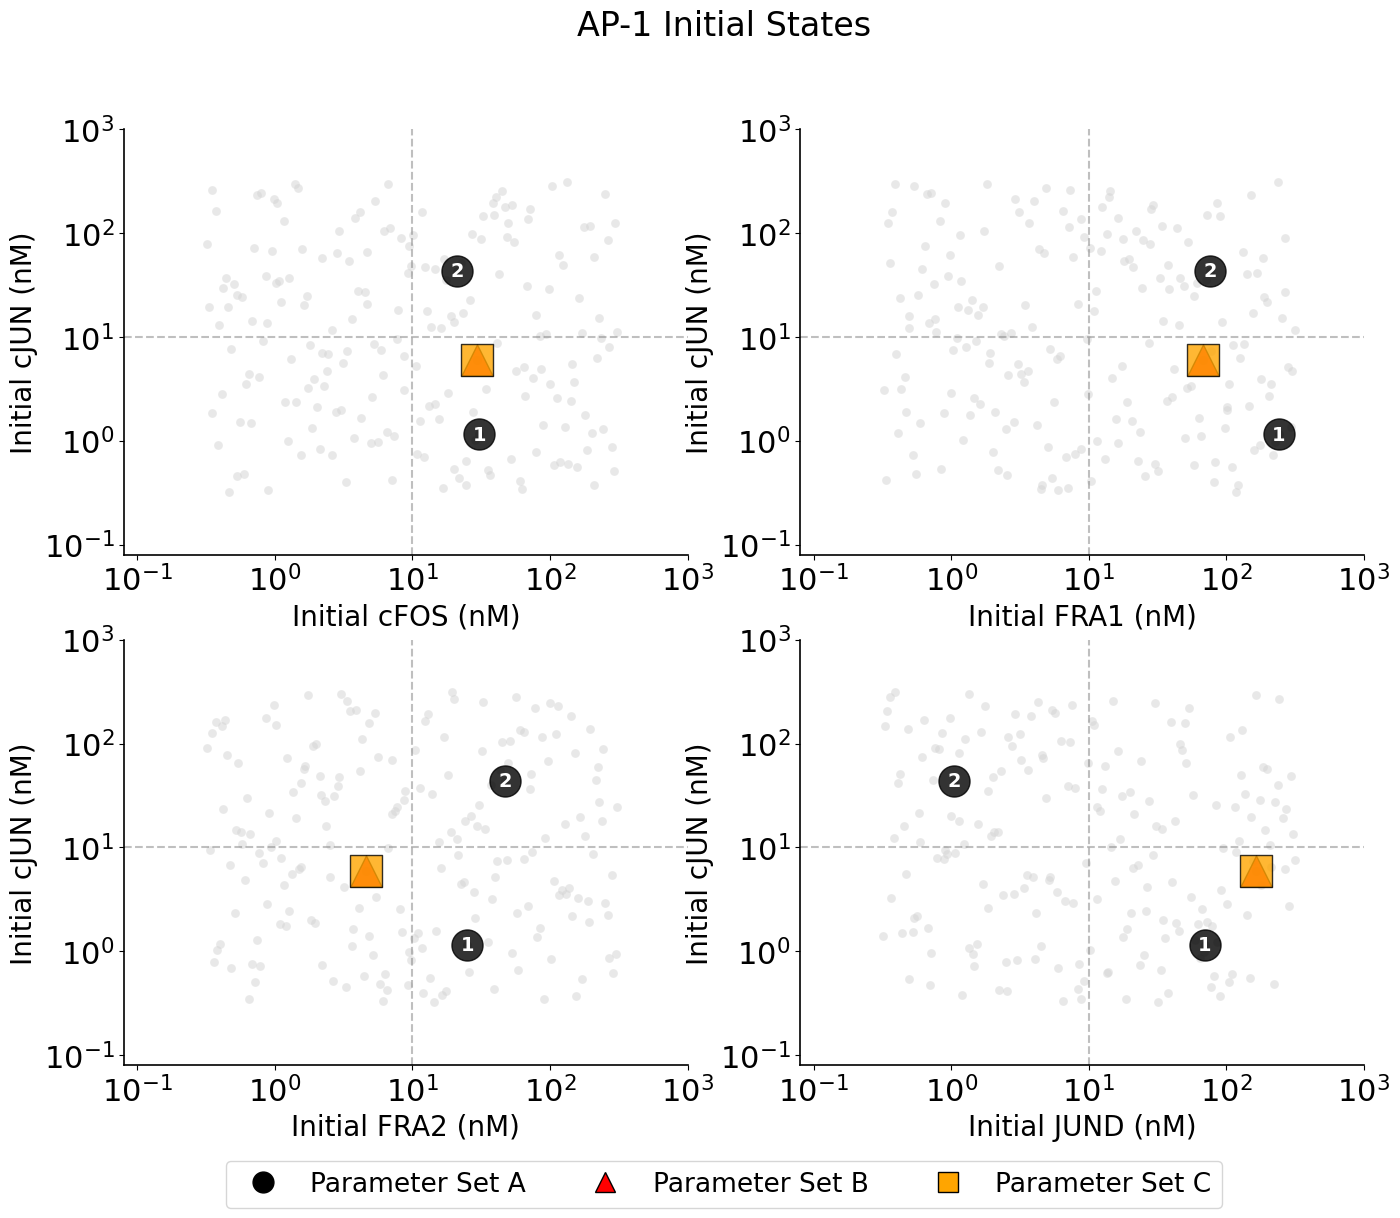


=== STEADY STATES ===
Filtering unique steady states based on 5D protein values
Original data points: 3936000
Unique ['Total cFOS', 'Total cJUN', 'Total FRA1', 'Total FRA2', 'Total JUND']: 20881 points
Reduction: 99.47% (3915119 points removed)
On average, 188.50 different parameter+initial combinations converge to the same steady state
Found 4 matching highlighted points in data
Saved PDF to: ../figures/Fig1A_unique_steadystate_FRA2_high_low.pdf


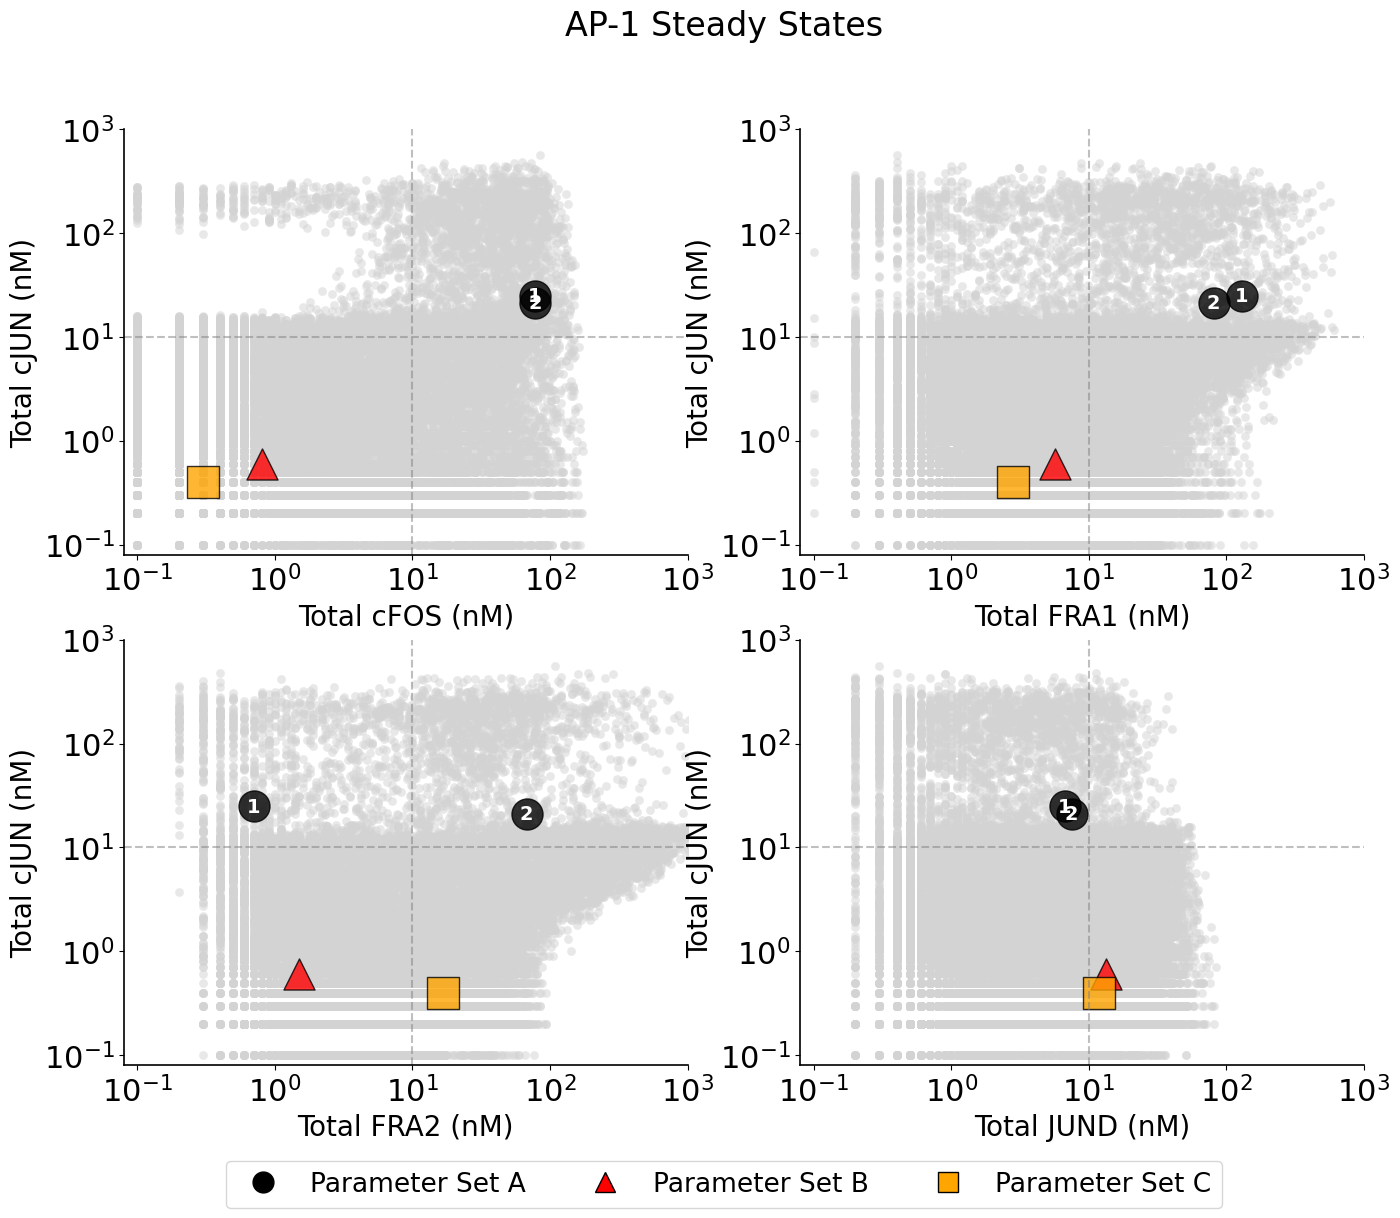

In [25]:
def plot_paired_values_highlighted(states, plot_dat, is_steady_state=False, round_precision=3):
    # Define the columns that determine uniqueness based on plot type
    if is_steady_state:
        unique_cols = ['Total cFOS', 'Total cJUN', 'Total FRA1', 'Total FRA2', 'Total JUND']
        print("Filtering unique steady states based on 5D protein values")
    else:
        unique_cols = ['Initial cFOS', 'Initial cJUN', 'Initial FRA1', 'Initial FRA2', 'Initial JUND']
        print("Filtering unique initial states")
    
    # Option to round values before checking uniqueness (to account for numerical precision)
    if round_precision is not None:
        # Create a temporary dataframe with rounded values for checking uniqueness
        rounded_states = states.copy()
        for col in unique_cols:
            rounded_states[col] = rounded_states[col].round(round_precision)
        # Use the rounded values for uniqueness check
        unique_states = rounded_states.drop_duplicates(subset=unique_cols)
        # Map back to original index to get unrounded values
        unique_states = states.loc[unique_states.index]
    else:
        # Keep only unique states based on the exact 5D values
        unique_states = states.drop_duplicates(subset=unique_cols)
    
    # First, extract the rows corresponding to plot_dat to ensure they're preserved
    highlighted_indices = []
    for _, row in plot_dat.iterrows():
        # Find matching rows in states
        matches = states[(states['param_index'] == row['param_index']) & 
                         (states['init_cond_index'] == row['init_cond_index'])]
        if not matches.empty:
            highlighted_indices.append(matches.index[0])  # Keep the first match for each highlighted point
    
    # Get the highlighted rows
    highlighted_rows = states.loc[highlighted_indices].copy() if highlighted_indices else pd.DataFrame()
    
    # Calculate reduction metrics
    original_count = len(states)
    unique_count = len(unique_states)
    reduction_percent = (1 - unique_count/original_count) * 100
    avg_convergence = original_count / unique_count if unique_count > 0 else 0
    
    print(f"Original data points: {original_count}")
    print(f"Unique {unique_cols}: {unique_count} points")
    print(f"Reduction: {reduction_percent:.2f}% ({original_count-unique_count} points removed)")
    print(f"On average, {avg_convergence:.2f} different parameter+initial combinations converge to the same steady state")
    
    # Combine unique states with highlighted points to ensure they're included
    if not highlighted_rows.empty:
        states = pd.concat([unique_states, highlighted_rows]).drop_duplicates()
    else:
        states = unique_states
        
    title = 'AP-1 Steady States' if is_steady_state else 'AP-1 Initial States'
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(title, fontsize=24)

    # Flatten the 2D array of axes for easier iteration
    axs = axs.flatten()
    for ax in axs:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

    # Set specific colors for the three param_index values
    colors = ['black', 'red', 'orange']  # Reversed order
    color_labels = ['Parameter Set A', 'Parameter Set B', 'Parameter Set C']  # This matches your colors

    param_color_dict = dict(zip(plot_dat['param_index'].unique(), colors))
    
    # Set specific marker shapes for each color
    marker_dict = {
        'black': 'o',    # Circle for black
        'red': '^',      # Triangle for red
        'orange': 's'    # make square for orange
    }

    # Define column names based on whether we're plotting initial or steady states
    if is_steady_state:
        x_cols = ['Total cFOS', 'Total FRA1', 'Total FRA2', 'Total JUND']
        y_col = 'Total cJUN'
        plotname = 'Fig1A_unique_steadystate_FRA2_high_low'
    else:
        x_cols = ['Initial cFOS', 'Initial FRA1', 'Initial FRA2', 'Initial JUND']
        y_col = 'Initial cJUN'
        plotname = 'Fig1A_unique_initialstate_FRA2_high_low'
        
    # Merge plot_dat with states to get highlighted points
    highlighted_points = pd.merge(states, plot_dat[['param_index', 'init_cond_index']], 
                                 on=['param_index', 'init_cond_index'])
    
    # Print diagnostic info about highlighted points
    print(f"Found {len(highlighted_points)} matching highlighted points in data")
    if len(highlighted_points) < len(plot_dat):
        print("WARNING: Not all highlighted points were found in the data!")

    # Create empty list to store legend handles
    legend_handles = []
    
    # Plot each variable against jun/cJUN
    for i, col in enumerate(x_cols):
        # Plot all points - use smaller point size and simplify marker
        axs[i].scatter(states[col], states[y_col], 
                      alpha=0.5, color='lightgrey', s=40,
                      linewidths=0)  # Remove edge for background points
        
        # Add dashed lines at x=10 and y=10
        axs[i].axhline(y=10, color='gray', linestyle='--', alpha=0.5)
        axs[i].axvline(x=10, color='gray', linestyle='--', alpha=0.5)
        
        # Only proceed with highlighted points if we found any
        if not highlighted_points.empty:
            # Get orange squares to number them
            orange_points = highlighted_points[highlighted_points['param_index'] == plot_dat['param_index'].unique()[0]]
            
            # Get the unique parameter_index values
            unique_params = highlighted_points['param_index'].unique()
            
            # Highlight specified points
            for param_idx in unique_params:
                param_points = highlighted_points[highlighted_points['param_index'] == param_idx]
                color = param_color_dict[param_idx]
                marker = marker_dict[color]
                
                # Plot the points
                scatter = axs[i].scatter(param_points[col], param_points[y_col], 
                                        alpha=0.8, edgecolors='k', color=color, 
                                        marker=marker, s=500)
                
                # Only add to legend handles in the first subplot
                if i == 0:
                    # Find the corresponding label index
                    label_idx = list(param_color_dict.keys()).index(param_idx)
                    legend_handles.append((scatter, color_labels[label_idx]))
            
            # Add numbers to orange squares if we have any
            if not orange_points.empty:
                for idx, row_idx in enumerate(orange_points.index, 1):
                    # Use .loc[] to access values directly
                    x_value = orange_points.loc[row_idx, col]
                    y_value = orange_points.loc[row_idx, y_col]
                    axs[i].text(x_value, y_value, str(idx), 
                               fontsize=14, ha='center', va='center', color='white', fontweight='bold')
        
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')

        # Set y lim and x lim from 10^-1 to 10^3
        axs[i].set_xlim(0.08, 10**3)
        axs[i].set_ylim(0.08, 10**3)
        axs[i].set_xlabel(col + ' (nM)')
        axs[i].set_ylabel(y_col + ' (nM)')
        # turn off minor ticks
        axs[i].minorticks_off()


    
    # Add a single legend for all parameter sets at the bottom of the figure
    legend_elements = [plt.Line2D([0], [0], marker=marker_dict[colors[i]], color=colors[i], 
                                 label=color_labels[i], markersize=15, linestyle='None', 
                                 markeredgecolor='k') 
                       for i in range(len(colors))]
    fig.legend(handles=legend_elements, loc='lower center', ncol=3, fontsize=19, 
              frameon=True, bbox_to_anchor=(0.5, -0.03))
    # Adjust subplot positions to make room for the legend
    plt.subplots_adjust(bottom=0.1)
    
    # Save as PDF
    pdf_path = f'../figures/{plotname}.pdf'
    #plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
    print(f"Saved PDF to: {pdf_path}")
    
    plt.show()

print("\n=== INITIAL STATES ===")
plot_paired_values_highlighted(initial_states, plot_dat, is_steady_state=False, round_precision=None)

print("\n=== STEADY STATES ===")
# For steady states, try with rounding to account for small numerical differences that are biologically equivalent
plot_paired_values_highlighted(steady_states, plot_dat, is_steady_state=True, round_precision=3)

In [40]:
# names below assume you already have these two DataFrames
steady_df   = steady_states      # <- includes Total cFOS … Total JUND + param_index + init_cond_index
initial_df  = initial_states     # <- includes Initial cFOS … Initial JUND  + same indices

state_cols  = ['Total cFOS','Total cJUN','Total FRA1','Total FRA2','Total JUND']

# unique steady states and their basin sizes
uni = (steady_df
       .groupby(state_cols, as_index=False)
       .size()                      # 'size' column = basin frequency
       .rename(columns={'size':'freq'})
       .sort_values('freq', ascending=False)
       .reset_index(drop=True))

# attach an attractor_id for later joins
steady_df = steady_df.merge(
    uni.reset_index().rename(columns={'index':'attr_id'}),
    on=state_cols)


### Plot by showing initial state and steady states

#### Plot the dynamics for the highlighted states

In [26]:
plot_dat

,param_index,init_cond_index,fos,jun,fra1,fra2,jund,state,fra2_lab
0,215,136,77.3,24.8,128.7,0.7,6.7,"high, high, high, low, low",low
1,215,129,77.7,21.2,80.8,67.6,7.5,"high, high, high, high, low",high
2,10,0,0.8,0.6,5.7,1.5,13.4,"low, low, low, low, high",low
3,12,0,0.3,0.4,2.8,16.8,11.9,"low, low, low, high, high",high


In [ ]:

input_states = input_states_1.copy()
tp_data = input_states.copy()
tp_data.rename(columns={'Initial cFOS': 'fos', 'Initial cJUN': 'jun', 'Initial FRA1': 'fra1', 'Initial FRA2': 'fra2', 'Initial JUND': 'jund'}, inplace=True)
# want_index = [12]

# tp_data = tp_data[tp_data['param_index'].isin(want_index)]

tp_data

,param_index,init_cond_index,α_cFOS,α_cJUN,α_FRA1,α_FRA2,α_JUND,β_cJUN_by_cJUNcJUN,β_cJUN_by_cJUNcFOS,β_FRA1_by_cJUNFRA1,...,γ_cJUN,γ_FRA1,γ_FRA2,γ_JUND,fos,jun,fra1,fra2,jund,state
0,0,100,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,1.15866,129.64109,0.82135,64.92609,1.63517,"low,high,low,high,low"
1,0,193,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,150.17111,3.70649,3.36273,28.04280,5.88032,"high,low,low,high,low"
2,0,192,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,6.21503,104.39339,22.10228,44.68412,7.31297,"low,high,high,high,low"
3,0,191,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,169.33635,10.84113,2.69760,0.57990,1.23386,"high,high,low,low,low"
4,0,190,0.43985,0.26434,0.32249,0.54097,0.17389,40.73096,3.14502,25.74013,...,0.66562,0.62684,0.13611,0.19882,0.45526,19.51223,1.11790,165.04464,151.10693,"low,high,low,high,high"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935995,19999,198,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,0.88164,13.47613,0.69217,0.65776,302.72699,"low,high,low,low,high"
3935996,19999,199,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,5.26777,8.61649,134.99632,204.14300,0.92422,"low,low,high,high,low"
3935997,19999,189,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,1.43262,2.35414,5.55901,57.24456,4.10586,"low,low,low,high,low"
3935998,19999,190,2.80697,0.18175,0.13086,0.77364,0.23755,6.57546,3.25091,2.54907,...,1.42201,0.44026,0.23894,0.20119,0.45526,19.51223,1.11790,165.04464,151.10693,"low,high,low,high,high"


In [77]:
def fixed_initial_variables(species_name, species_value):
    """This function sets the initial value of the species to the value in species_value
    this will be used for setting the initial values of dimers once you load the model
    Enter the species name and the value in a list
    species_name: list of species names
    species_value: list of species values 
    """
    for i in range(len(species_name)):
        set_species(
            name=species_name[i], initial_concenration=species_value[i], exact=True)

#change local or global parameters
def change_model_parameters(par_name, par_value, par_type):
    """ This function changes the model parameters to the values in par_value
    Enter the parameter name and the value in a list
    par_name: list of parameter names
    par_value: list of parameter values
    par_type: string: 'local' or 'global' 
    """
    if par_type == 'local':
        for i in range(len(par_name)):
            set_reaction_parameters(name=par_name[i], value=par_value[i])
    elif par_type == 'global':
        for i in range(len(par_name)):
            set_parameters(name=par_name[i], initial_value=par_value[i])

In [88]:
# Filter tp_data to keep only the specific rows for param_index,init_cond_index pairs: (1700,88) and (1900,113)
filtered_tp_data = tp_data[
    ((tp_data['param_index'] == 5056) & (tp_data['init_cond_index'] == 55)) | 
    ((tp_data['param_index'] == 12271) & (tp_data['init_cond_index'] == 125))
]
filtered_tp_data


,param_index,init_cond_index,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_fra2).v,(basal_jund).v,(jun_by_junjun).beta,(jun_by_junfos).beta,(fra1_by_junfra1).beta,...,(degradation_jun).k1,(degradation_fra1).k1,(degradation_fra2).k1,(degradation_jund).k1,fos,jun,fra1,fra2,jund,state
997181,5056,55,6.487545,0.117968,2.665653,0.506476,1.048752,73.559590,129.141486,2.185654,...,0.659417,0.369732,0.099593,0.092392,12.034895,0.695695,6.818689,0.480595,6.013768,"high,low,low,low,low"
2417423,12271,125,2.510527,3.188953,0.249607,0.889732,0.334945,174.163639,182.886136,41.217770,...,0.606315,0.409108,0.181736,0.059349,10.750197,0.749919,7.932320,0.682627,8.543069,"high,low,low,low,low"


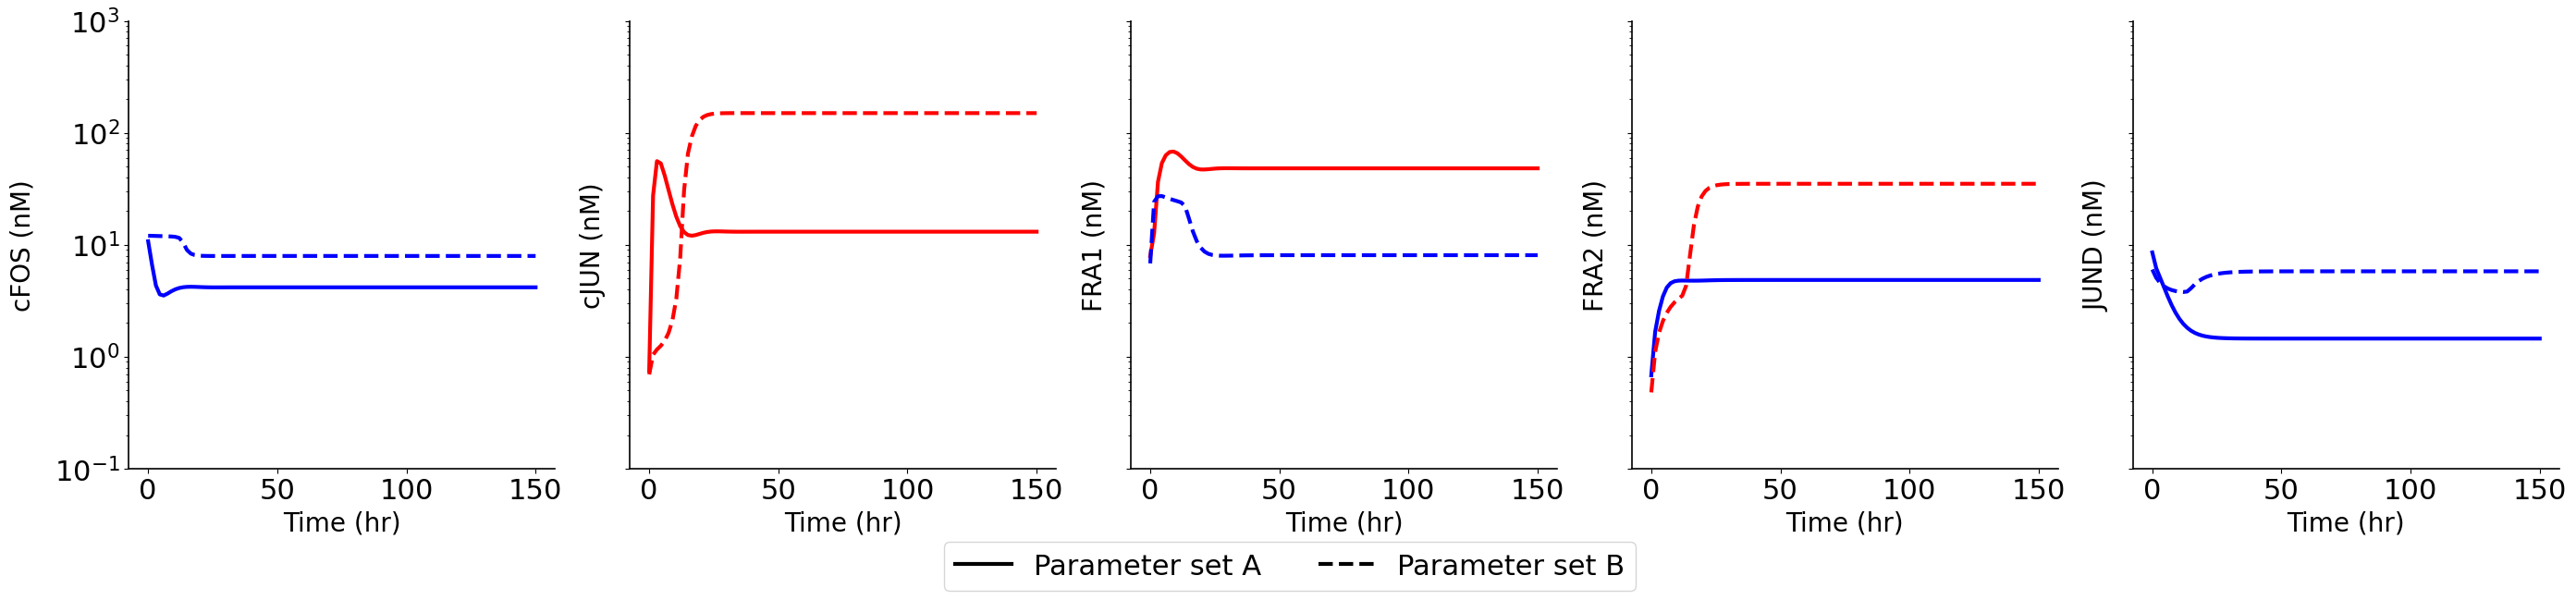

In [72]:
# Define the parameter and initial condition columns
param_columns = filtered_tp_data.columns[2:17]  # Columns 2:17
init_cond_columns = filtered_tp_data.columns[17:22]  # Columns 17:22

# Create a figure with 5 subplots (1 row, 5 columns) for each protein
fig, axs = plt.subplots(1, 5, figsize=(28, 6), sharey=True)

# Define protein order and their display names (without "Total")
proteins = ['fos_total', 'jun_total', 'fra1_total', 'fra2_total', 'jund_total']
protein_display = ['cFOS', 'cJUN', 'FRA1', 'FRA2', 'JUND']

# Dictionary to store all time course data
tc_data = {}

# Loop through each row in the filtered dataset to collect time course data
for i, (index, row) in enumerate(filtered_tp_data.iterrows()):
    # Extract parameters and initial conditions
    param_values = row[param_columns].values.tolist()
    init_cond_rows = row[init_cond_columns].values

    change_model_parameters(param_columns, param_values, 'local')

    # Set all dimer initial conditions to 0
    spec_names = ['junfos', 'junfra1', 'junfra2','junjund','junjun','jundfos','jundfra1','jundfra2','jundjund']
    spec_vals = np.zeros(len(spec_names)).tolist() 
    fixed_initial_variables(spec_names, spec_vals)

    # Set the initial conditions for the 5 proteins
    species_name = ['fos', 'jun', 'fra1', 'fra2', 'jund']
    for j, name in enumerate(species_name):
        set_species(name=name, initial_concentration=init_cond_rows[j], exact=True)

    # Run the time course simulation
    tc = run_time_course(duration=150)
    tc_totals = tc.loc[:,proteins]
    
    # Store the time course data with an identifier
    param_idx = row['param_index']
    init_cond_idx = row['init_cond_index']
    tc_data[f"{param_idx}_{init_cond_idx}"] = tc_totals

# Now plot each protein in its own subplot
for i, protein in enumerate(proteins):
    ax = axs[i]
    
    # Plot both parameter sets with different line styles
    linestyle = ['-', '--']
    param_set_labels = ['Parameter set A', 'Parameter set B']
    
    for j, key in enumerate(sorted(tc_data.keys())):
        # Determine color based on final value (steady state)
        final_value = tc_data[key][protein].iloc[-1]
        color = 'red' if final_value > 10 else 'blue'
        
        # Plot this protein's data with color based on steady state value
        ax.plot(tc_data[key].index, tc_data[key][protein], 
                color=color, 
                linestyle=linestyle[j], 
                linewidth=3)
    
    # Configure subplot
    ax.set_yscale('log')
    ax.set_ylim(0.1, 1000)
    ax.set_xlabel('Time (hr)')
    
    if i == 0:
        ax.set_ylabel('Concentration (nM)')
    
    # Remove title and make the protein name the y-label instead
    ax.set_title('')
    ax.set_ylabel(f'{protein_display[i]} (nM)', rotation=90, labelpad=15)

# Create line style legends only (no color legend)
style_handles = [
    plt.Line2D([0], [0], color='black', lw=3, linestyle='-', label='Parameter set A'),
    plt.Line2D([0], [0], color='black', lw=3, linestyle='--', label='Parameter set B')
]

# Add a single horizontal legend for parameter sets
fig.legend(style_handles, [h.get_label() for h in style_handles], 
           loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2,fontsize=22)

# Remove any existing legends from subplots
for ax in axs:
    if ax.get_legend():
        ax.get_legend().remove()

# Adjust layout
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
  # Make room for the legend at the bottom
# save as high res pdf
# plt.savefig('Fig1Supp_time_course_simulations_FRA2_high_low.pdf', dpi=300,bbox_inches='tight')
# plt.show()

#### One parameter set and all initial condition

In [ ]:
# # 1) Extract columns
# param_columns = tp_data.columns[2:17]   # your parameter columns
# init_cond_columns = tp_data.columns[17:22]  # your initial-condition columns

# # 2) Collect time-course data for every initial condition under param_index == 12
# tc_data = {}
# for _, row in tp_data.iterrows():
#     # set parameters
#     param_values = row[param_columns].values.tolist()
#     change_model_parameters(param_columns, param_values, 'local')

#     # zero out all dimer initials
#     spec_names = ['junfos','junfra1','junfra2','junjund','junjun',
#                   'jundfos','jundfra1','jundfra2','jundjund']
#     fixed_initial_variables(spec_names, [0]*len(spec_names))

#     # set the five AP-1 initials
#     species_names = ['fos','jun','fra1','fra2','jund']
#     for name, val in zip(species_names, row[init_cond_columns].values):
#         set_species(name=name, initial_concentration=val, exact=True)

#     # run simulation
#     tc = run_time_course(duration=150)
#     tc_totals = tc.loc[:, ['fos_total','jun_total','fra1_total','fra2_total','jund_total']]

#     key = f"{int(row['param_index'])}_{int(row['init_cond_index'])}"
#     tc_data[key] = tc_totals

# # 3) Plotting: one color for all trajectories
# fig, axs = plt.subplots(1, 5, figsize=(24, 6), sharey=True)
# proteins = ['fos_total','jun_total','fra1_total','fra2_total','jund_total']
# protein_display = ['cFOS','cJUN','FRA1','FRA2','JUND']
# highlight_color = 'orange'

# for ax, protein, label in zip(axs, proteins, protein_display):
#     # background: all trajectories in orange
#     for tc in tc_data.values():
#         ax.plot(tc.index, tc[protein],
#                 color=highlight_color,
#                 linewidth=1,
#                 alpha=0.8)

#     # log axes & limits
#     ax.set_yscale('log')
#     ax.set_ylim(0.1, 1000)
#     ax.set_xscale('linear')  # time is linear
#     ax.set_xlabel('Time (hr)')
#     # set minor ticks off
#     ax.minorticks_off()
# # Set exactly 5 ticks on x-axis
#     ax.set_xticks([0, 50, 100, 150])  # 5 evenly spaced ticks from 0 to 150

#     # Set y-label as protein name + (nM) for each subplot
#     ax.set_ylabel(f'{label} (nM)')
#     ax.tick_params(axis='y', left=True, labelleft=True)
    
#     # Remove title (commented out)
#     # ax.set_title(label)

#     # despine
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')

# # 4) Layout adjustments
# plt.tight_layout(rect=[0,0,1,0.95])
# plt.subplots_adjust(bottom=0.15)

# # 5) (Optional) Save figure
# plot_name = '1C_all_initial_conditions_param12'
# pdf_path = f'../figures/{plot_name}.pdf'
# plt.savefig(pdf_path, dpi=300, bbox_inches='tight')

# plt.show()

#### Figure 2F One initial condition and many parameters

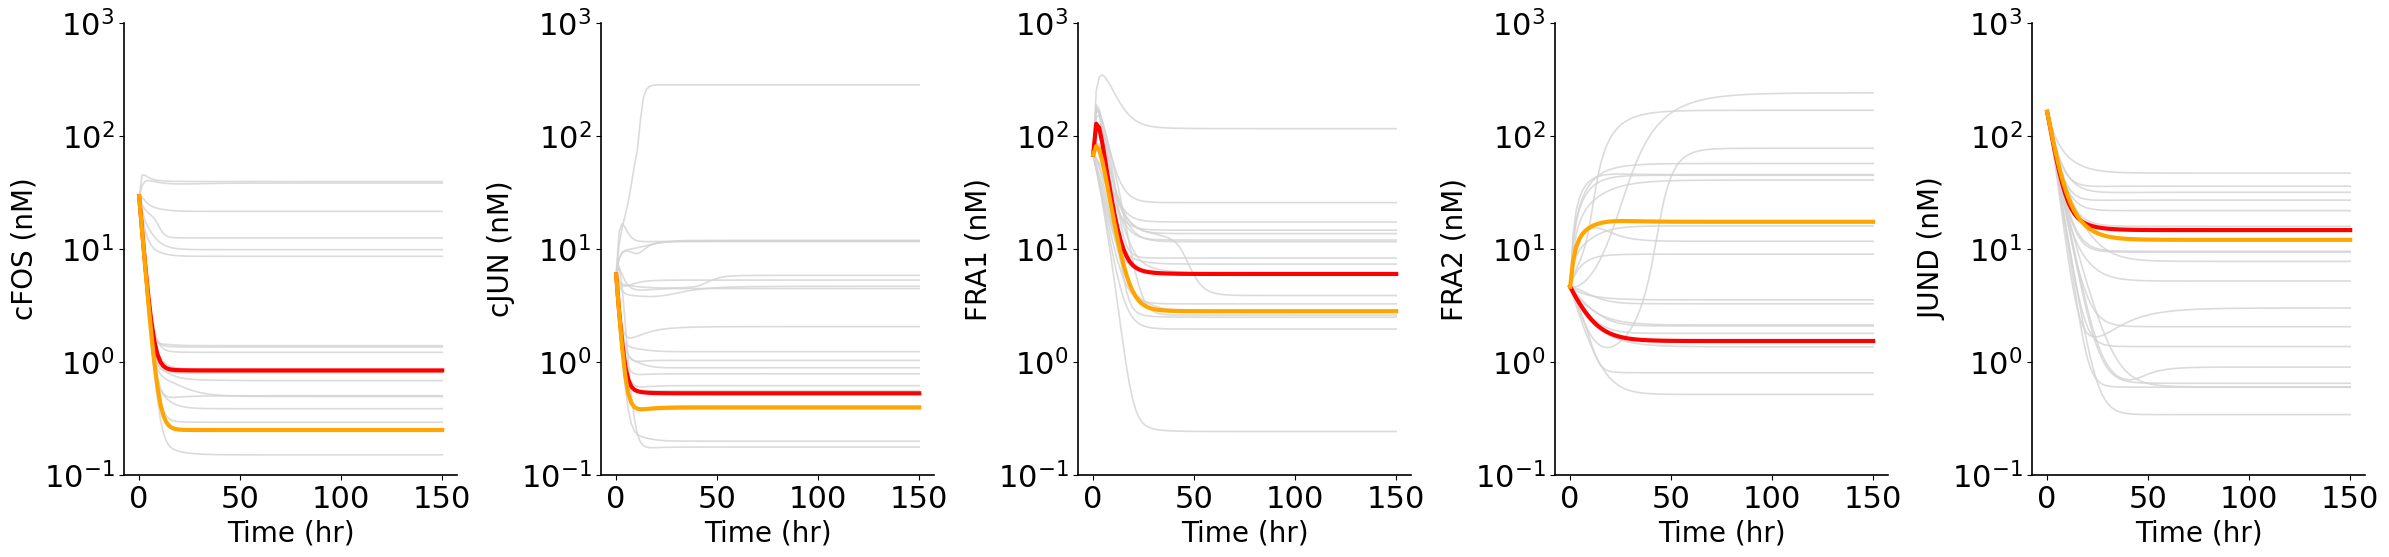

In [90]:
import random
# set seed
random.seed(42)

# 1) Build your param_list of ~200
row0       = sensitive_df[sensitive_df['init_cond_index']==0].iloc[0]
low_params = row0['param_index_low']
high_params= row0['param_index_high']

# How many of each to sample
n_each = 10
low_samp  = random.sample(low_params,  min(n_each, len(low_params)))
high_samp = random.sample(high_params, min(n_each, len(high_params)))

# Ensure 10 & 12 are in there
for p in (10, 12):
    if p in low_params  and p not in low_samp:
        low_samp[0] = p
    if p in high_params and p not in high_samp:
        high_samp[0] = p

param_list = sorted(set(low_samp + high_samp))

# Step 2: filter tp_data down to that one init_cond_index and those params
filtered_tp_data = tp_data[
    (tp_data['init_cond_index'] == 0) &
    (tp_data['param_index'].isin(param_list))
].copy()

# Step 3: identify your parameter vs. initial‐condition columns
param_columns     = filtered_tp_data.columns[2:17]
init_cond_columns = filtered_tp_data.columns[17:22]

# Step 4: run time courses for each (param, init) pair
tc_data = {}
for _, row in filtered_tp_data.iterrows():
    # 4a) set the model parameters
    change_model_parameters(param_columns, row[param_columns].tolist(), 'local')

    # 4b) zero out all dimer initials
    spec_names = ['junfos','junfra1','junfra2','junjund','junjun',
                  'jundfos','jundfra1','jundfra2','jundjund']
    fixed_initial_variables(spec_names, [0]*len(spec_names))

    # 4c) set the five AP-1 initials
    species_names = ['fos','jun','fra1','fra2','jund']
    for name, val in zip(species_names, row[init_cond_columns].values):
        set_species(name=name, initial_concentration=val, exact=True)

    # 4d) simulate and store only the "_total" species
    tc = run_time_course(duration=150)
    tc_totals = tc.loc[:, ['fos_total','jun_total','fra1_total','fra2_total','jund_total']]

    key = f"{int(row['param_index'])}_{int(row['init_cond_index'])}"
    tc_data[key] = tc_totals

# Step 5: plot all trajectories, highlight #10 in red, #12 in orange
fig, axs = plt.subplots(1, 5, figsize=(24, 6), sharey=True)
proteins = ['fos_total','jun_total','fra1_total','fra2_total','jund_total']
labels   = ['cFOS','cJUN','FRA1','FRA2','JUND']

for ax, prot, lab in zip(axs, proteins, labels):
    # a) all grey in the background
    for key, df in tc_data.items():
        p = int(key.split('_')[0])
        if p not in (10,12):
            ax.plot(df.index, df[prot],
                    color='lightgrey',
                    linewidth=1.2,
                    alpha=0.8,
                    zorder=1)
    # b) highlight param 10 in red
    for key in tc_data:
        p = int(key.split('_')[0])
        if p == 10:
            df = tc_data[key]
            ax.plot(df.index, df[prot],
                    color='red',
                    linewidth=3,
                    alpha=1.0,
                    zorder=3,
                    label='Param 10')
    # c) highlight param 12 in orange
    for key in tc_data:
        p = int(key.split('_')[0])
        if p == 12:
            df = tc_data[key]
            ax.plot(df.index, df[prot],
                    color='orange',
                    linewidth=3,
                    alpha=1.0,
                    zorder=3,
                    label='Param 12')

    ax.set_yscale('log')
    ax.set_ylim(0.1, 1000)
    ax.set_xlabel('Time (hr)')
    
    # Set exactly 5 ticks on x-axis
    ax.set_xticks([0, 50, 100, 150])
    
    # Set y-label as protein name + (nM) for each subplot
    ax.set_ylabel(f'{lab} (nM)')
    # set minor ticks off
    ax.minorticks_off()
    
    # Remove title (commented out)
    # ax.set_title(lab)

    # despine
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


# # Step 6: add a legend for the two highlighted params
# legend_handles = [
#     Line2D([0], [0], color='red',    lw=3, label='Param 10'),
#     Line2D([0], [0], color='orange', lw=3, label='Param 12')
# ]
# fig.legend(handles=legend_handles,
#            loc='lower center',
#            ncol=2,
#            fontsize=16,
#            frameon=False,
#            bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(bottom=0.15)
plot_name = '1D_one_initial_condition_many_params'
pdf_path = f'../figures/{plot_name}.pdf'
plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
plt.show()

#### Figure 2G Plot the non calibrated unique steady states

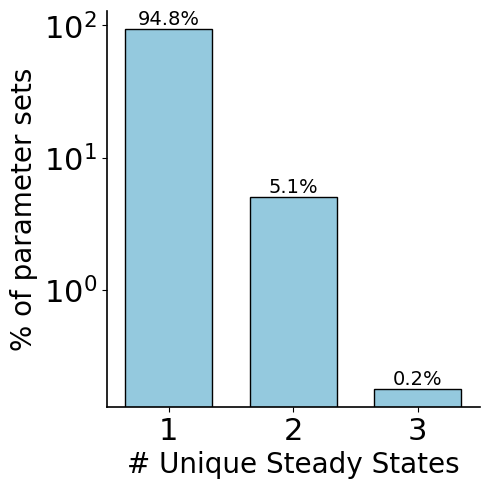

Table of param_index and number of unique states:
       param_index  num_unique_states
15542        15793                  3
9466          9598                  3
18480        18779                  3
16048        16303                  3
10035        10177                  3
...            ...                ...
6729          6819                  1
6728          6818                  1
6726          6816                  1
6725          6815                  1
19679        19999                  1

[19680 rows x 2 columns]

Parameters with more than one unique state:
       param_index  num_unique_states
15542        15793                  3
9466          9598                  3
18480        18779                  3
16048        16303                  3
10035        10177                  3
...            ...                ...
5331          5404                  2
7777          7888                  2
4894          4961                  2
9606          9741                  2
5710 

In [28]:
def count_uniq_states(data):
    # Ensure 'param_index' and 'state' columns exist
    if 'param_index' not in data.columns or 'state' not in data.columns:
        raise ValueError("Data must contain 'param_index' and 'state' columns")

    # Group by 'param_index' and count unique 'state' values
    unique_counts = data.groupby('param_index')['state'].nunique().reset_index(name='num_unique_states')

    # Sort the table by num_unique_states in descending order
    params_states_table = unique_counts.sort_values('num_unique_states', ascending=False)

    # Filter the DataFrame to identify parameters with more than one unique state
    params_more_than_one_state = params_states_table[params_states_table['num_unique_states'] > 1]

    # Similarly, get the parameters with only one state
    params_one_state = params_states_table[params_states_table['num_unique_states'] == 1]

    # Count the distribution of unique states
    count_distribution = params_states_table['num_unique_states'].value_counts().sort_index()
    
    # Calculate percentages
    total_params = len(params_states_table)
    percent_distribution = (count_distribution / total_params) * 100

    # Plot the result
    plt.figure(figsize=(5, 5))
    bars = sns.barplot(x=percent_distribution.index, y=percent_distribution.values, color='skyblue', edgecolor='black', width=0.7)
    bars.set_ylabel('% of parameter sets')
    bars.set_xlabel('# Unique Steady States')
    plt.xticks()
    plt.yticks()
    # make y axis log scale
    plt.yscale('log')
    # set minor ticks off
    ax = plt.gca()
    ax.minorticks_off()
    
    # Add percentage labels on top of each bar
    for i, p in enumerate(bars.patches):
        percentage = percent_distribution.iloc[i]
        bars.annotate(f'{percentage:.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=14)

    plt.tight_layout()
    # save pdf 
    #plt.savefig('1F_unique_states_percentage.pdf', bbox_inches='tight')
    plt.show()
    print("Table of param_index and number of unique states:")
    print(params_states_table)

    print("\nParameters with more than one unique state:")
    print(params_more_than_one_state)
    
    print("\nParameters with only one unique state:")
    print(params_one_state)

    # Create a detailed DataFrame showing all states for parameters with more than one state
    params_with_multiple_states_details = []
    for param_idx in params_more_than_one_state['param_index']:
        param_states = data[data['param_index'] == param_idx]['state'].unique()
        for state in param_states:
            params_with_multiple_states_details.append({
                'param_index': param_idx,
                'state': state
            })
    
    params_multiple_states_df = pd.DataFrame(params_with_multiple_states_details)
    print("\nDetailed view of all states for parameters with more than one state:")
    print(params_multiple_states_df)

    return params_states_table, params_more_than_one_state, params_one_state
params_states_table, params_more_than_one_state, params_one_state = count_uniq_states(model_states)

#### Figure 2H Plot multistable states

Selected 2 clusters (silhouette=1.00) for param_index 215


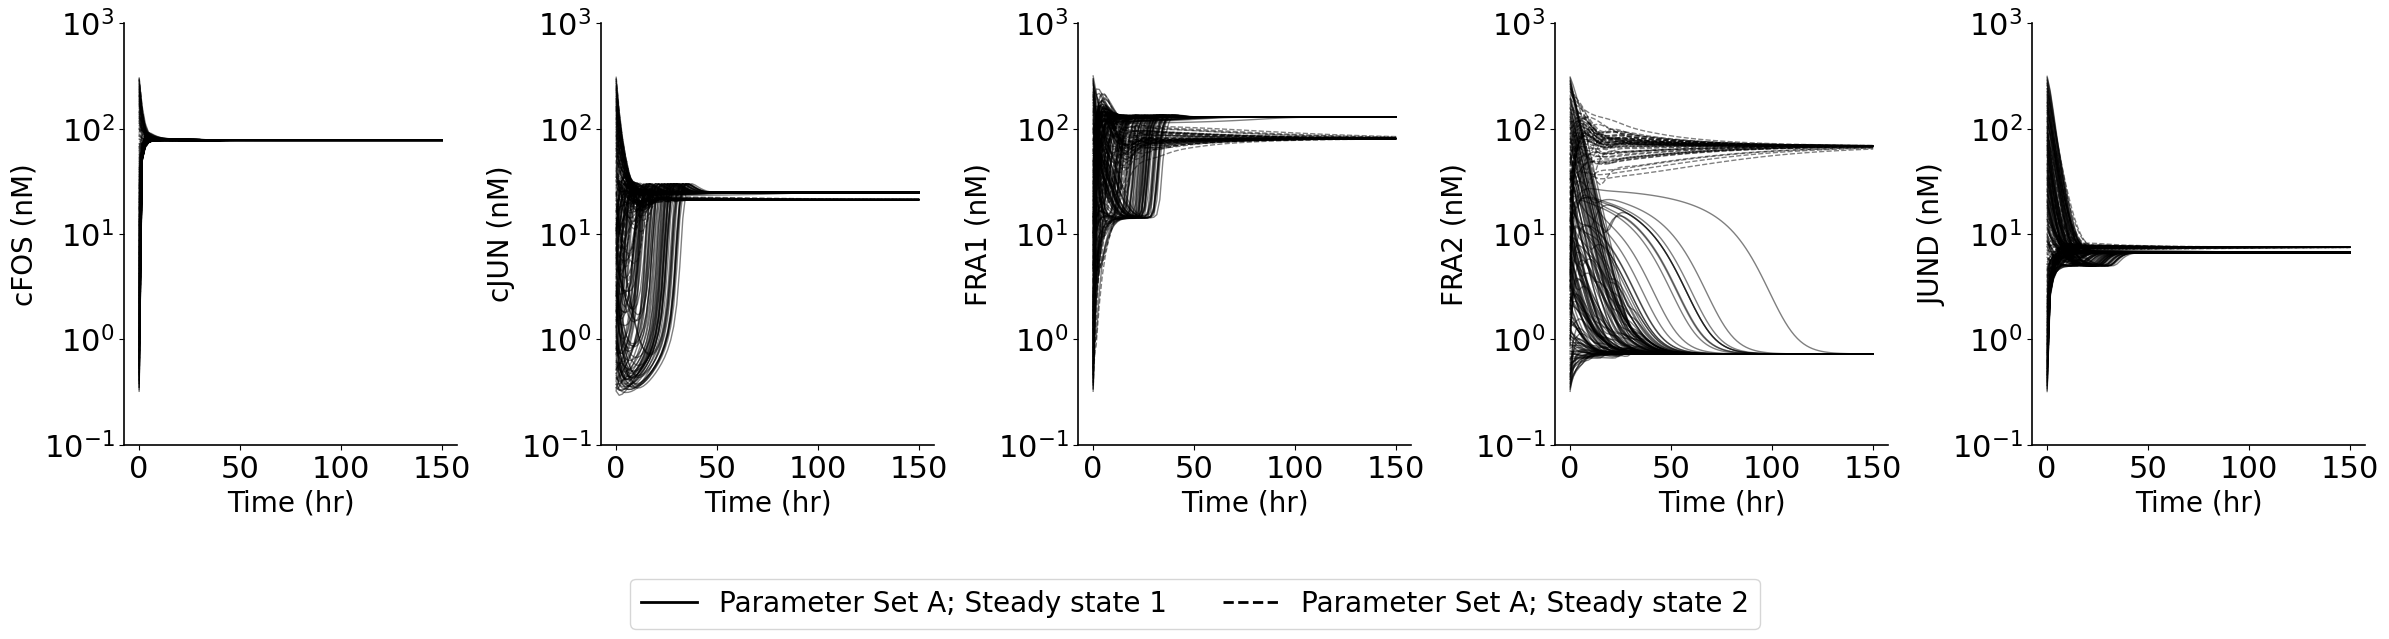

In [92]:
def plot_protein_timecourses(data, param_index, param_label='A', decimals=1, max_clusters=5):
    """
    - Runs all IC sims once
    - Rounds final 5D vector to `decimals`
    - Uses KMeans + silhouette to pick best k (2 ≤ k ≤ max_clusters)
    - Plots each trajectory in black, linestyle by cluster
    - Matches figsize & aesthetics from reference
    """
    # 1) filter & parameter setup
    df = data[data['param_index'] == param_index]
    param_cols = df.columns[2:17]
    init_cols  = df.columns[17:22]
    change_model_parameters(param_cols, df.iloc[0][param_cols].tolist(), 'local')
    
    # species and plot labels
    species_names   = ['fos','jun','fra1','fra2','jund']
    proteins        = [f'{sp}_total' for sp in species_names]
    protein_display = ['cFOS','cJUN','FRA1','FRA2','JUND']
    
    # 2) simulate & collect
    tcs = []
    finals = []
    for _, row in df.iterrows():
        # zero dimers
        spec_names = ['junfos','junfra1','junfra2','junjund','junjun',
                      'jundfos','jundfra1','jundfra2','jundjund']
        fixed_initial_variables(spec_names, [0]*len(spec_names))
        # set initials
        for sp, val in zip(species_names, row[init_cols].values):
            set_species(name=sp, initial_concentration=val, exact=True)
        # run simulation
        tc = run_time_course(duration=150)
        tc = pd.DataFrame(tc) if not isinstance(tc, pd.DataFrame) else tc
        tcs.append(tc[proteins])
        finals.append(np.round(tc[proteins].iloc[-1].values, decimals))
    
    X = np.vstack(finals)
    
    # 3) pick best k via silhouette
    best_k, best_score, best_labels = 2, -1, None
    for k in range(2, min(max_clusters, len(X)-1) + 1):
        km = KMeans(n_clusters=k, random_state=0).fit(X)
        labels = km.labels_
        score = silhouette_score(X, labels)
        if score > best_score:
            best_k, best_score, best_labels = k, score, labels
    
    labels = best_labels
    print(f"Selected {best_k} clusters (silhouette={best_score:.2f}) for param_index {param_index}")
    
    # 4) plot with aesthetics
    fig, axs = plt.subplots(1, 5, figsize=(24, 6), sharey=True)
    style_palette = ['-', '--', '-.', ':']
    linestyles = style_palette[:best_k]
    
    for ax, prot, label in zip(axs, proteins, protein_display):
        for tc, lab in zip(tcs, labels):
            ax.plot(tc.index, tc[prot],
                    color='black', linewidth=1,
                    linestyle=linestyles[lab], alpha=0.5)
        ax.set_yscale('log')
        ax.set_ylim(0.1, 1000)
        ax.set_xscale('linear')
        ax.set_xlabel('Time (hr)')
        
        # Set exactly 5 ticks on x-axis
        ax.set_xticks([0, 50, 100, 150])
        
        # Set y-label as protein name + (nM) for each subplot
        ax.set_ylabel(f'{label} (nM)')
        ax.tick_params(axis='y', left=True, labelleft=True)
        #set minor ticks off
        ax.minorticks_off()
        # Remove title (commented out)
        # ax.set_title(label)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
    
    # 5) legend
    handles = [
        Line2D([0],[0], color='black', lw=2,
               linestyle=linestyles[i],
               label=f'Parameter Set {param_label}; Steady state {i+1}')
        for i in range(best_k)
    ]
    fig.legend(handles=handles,
               loc='lower center',
               bbox_to_anchor=(0.5, -0.13),
               ncol=best_k)
    
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.subplots_adjust(bottom=0.2)
    # save as high res pdf
    plot_name = f'Fig1G_time_course_simulations_param{param_index}_tristable'
    pdf_path = f'../figures/{plot_name}.pdf'
    plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
    plt.show()
# 19693 for tristable
# Example usage:
plot_protein_timecourses(input_states,215, param_label='A', decimals=1, max_clusters=5)